In [23]:
import pandas as pd

# Load geometric data
geom_1 = pd.read_csv('volume1_geom.csv')
geom_2 = pd.read_csv('volume2_geom.csv')
geom_3 = pd.read_csv('volume3_geom.csv')

# Combine all geometric data into one DataFrame
geom_data = pd.concat([geom_1, geom_2, geom_3], ignore_index=True)

# Load experimental data
exp_1 = pd.read_csv('volume1_exp.csv')
exp_2 = pd.read_csv('volume2_exp.csv')
exp_3 = pd.read_csv('volume3_exp.csv')

# Combine all experimental data into one DataFrame
exp_data = pd.concat([exp_1, exp_2, exp_3], ignore_index=True)

# Merge geometric and experimental data on common columns
merged_data = pd.merge(exp_data, geom_data, on=['BladeName', 'Family', 'D', 'P'], how='inner')

# Display the merged dataset
print(merged_data.head())

              PropName        BladeName   Family  B    D    P      J       N  \
0  apc29ff 9.0x5.0 - 2  apc29ff 9.0x5.0  apc29ff  2  9.0  5.0  0.158  4007.0   
1  apc29ff 9.0x5.0 - 2  apc29ff 9.0x5.0  apc29ff  2  9.0  5.0  0.158  4007.0   
2  apc29ff 9.0x5.0 - 2  apc29ff 9.0x5.0  apc29ff  2  9.0  5.0  0.158  4007.0   
3  apc29ff 9.0x5.0 - 2  apc29ff 9.0x5.0  apc29ff  2  9.0  5.0  0.158  4007.0   
4  apc29ff 9.0x5.0 - 2  apc29ff 9.0x5.0  apc29ff  2  9.0  5.0  0.158  4007.0   

       CT      CP    eta    c/R   r/R   beta  
0  0.0886  0.0458  0.306  0.160  0.15  31.68  
1  0.0886  0.0458  0.306  0.146  0.20  34.45  
2  0.0886  0.0458  0.306  0.144  0.25  35.93  
3  0.0886  0.0458  0.306  0.143  0.30  33.33  
4  0.0886  0.0458  0.306  0.143  0.35  29.42  


In [34]:
import numpy as np

In [24]:
merged_data

,PropName,BladeName,Family,B,D,P,J,N,CT,CP,eta,c/R,r/R,beta
0,apc29ff 9.0x5.0 - 2,apc29ff 9.0x5.0,apc29ff,2,9.0,5.000000,0.158,4007.000,0.088600,0.045800,0.306,0.1600,0.15,31.680
1,apc29ff 9.0x5.0 - 2,apc29ff 9.0x5.0,apc29ff,2,9.0,5.000000,0.158,4007.000,0.088600,0.045800,0.306,0.1460,0.20,34.450
2,apc29ff 9.0x5.0 - 2,apc29ff 9.0x5.0,apc29ff,2,9.0,5.000000,0.158,4007.000,0.088600,0.045800,0.306,0.1440,0.25,35.930
3,apc29ff 9.0x5.0 - 2,apc29ff 9.0x5.0,apc29ff,2,9.0,5.000000,0.158,4007.000,0.088600,0.045800,0.306,0.1430,0.30,33.330
4,apc29ff 9.0x5.0 - 2,apc29ff 9.0x5.0,apc29ff,2,9.0,5.000000,0.158,4007.000,0.088600,0.045800,0.306,0.1430,0.35,29.420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285793,union 9x7.72 - 2,union 9x7.72,union,2,9.0,7.718262,0.000,17886.667,0.158606,0.083172,0.000,0.2752,0.80,13.576
285794,union 9x7.72 - 2,union 9x7.72,union,2,9.0,7.718262,0.000,17886.667,0.158606,0.083172,0.000,0.2668,0.85,12.258
285795,union 9x7.72 - 2,union 9x7.72,union,2,9.0,7.718262,0.000,17886.667,0.158606,0.083172,0.000,0.2567,0.90,10.807
285796,union 9x7.72 - 2,union 9x7.72,union,2,9.0,7.718262,0.000,17886.667,0.158606,0.083172,0.000,0.2182,0.95,8.551


In [25]:
print(merged_data.isnull().sum())
merged_data = merged_data.dropna()  # Drop rows with missing values

PropName     0
BladeName    0
Family       0
B            0
D            0
P            0
J            0
N            0
CT           0
CP           0
eta          0
c/R          0
r/R          0
beta         0
dtype: int64


In [26]:
merged_data = merged_data.drop_duplicates()

In [27]:
merged_data = merged_data[merged_data['CT'] >= 0]

In [28]:
merged_data['P/D'] = merged_data['P'] / merged_data['D']

In [29]:
merged_data['Family'] = merged_data['Family'].astype('category').cat.codes

In [30]:
merged_data

,PropName,BladeName,Family,B,D,P,J,N,CT,CP,eta,c/R,r/R,beta,P/D
0,apc29ff 9.0x5.0 - 2,apc29ff 9.0x5.0,0,2,9.0,5.000000,0.158,4007.000,0.088600,0.045800,0.306,0.1600,0.15,31.680,0.555556
1,apc29ff 9.0x5.0 - 2,apc29ff 9.0x5.0,0,2,9.0,5.000000,0.158,4007.000,0.088600,0.045800,0.306,0.1460,0.20,34.450,0.555556
2,apc29ff 9.0x5.0 - 2,apc29ff 9.0x5.0,0,2,9.0,5.000000,0.158,4007.000,0.088600,0.045800,0.306,0.1440,0.25,35.930,0.555556
3,apc29ff 9.0x5.0 - 2,apc29ff 9.0x5.0,0,2,9.0,5.000000,0.158,4007.000,0.088600,0.045800,0.306,0.1430,0.30,33.330,0.555556
4,apc29ff 9.0x5.0 - 2,apc29ff 9.0x5.0,0,2,9.0,5.000000,0.158,4007.000,0.088600,0.045800,0.306,0.1430,0.35,29.420,0.555556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285775,union 9x7.72 - 2,union 9x7.72,24,2,9.0,7.718262,0.000,17886.667,0.158606,0.083172,0.000,0.2752,0.80,13.576,0.857585
285776,union 9x7.72 - 2,union 9x7.72,24,2,9.0,7.718262,0.000,17886.667,0.158606,0.083172,0.000,0.2668,0.85,12.258,0.857585
285777,union 9x7.72 - 2,union 9x7.72,24,2,9.0,7.718262,0.000,17886.667,0.158606,0.083172,0.000,0.2567,0.90,10.807,0.857585
285778,union 9x7.72 - 2,union 9x7.72,24,2,9.0,7.718262,0.000,17886.667,0.158606,0.083172,0.000,0.2182,0.95,8.551,0.857585


In [35]:
# Calculate hover figure of merit (FM)
merged_data['FM'] = (merged_data['CT'] ** (3/2)) / (np.sqrt(2) * merged_data['CP'])

In [36]:
X = merged_data[['B', 'D', 'P', 'J', 'N', 'CP', 'eta', 'c/R', 'r/R', 'beta', 'P/D']]
y_ct = merged_data['CT']
y_fm = merged_data['FM']

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_ct_train, y_ct_test = train_test_split(X, y_ct, test_size=0.2, random_state=42)
X_train, X_test, y_fm_train, y_fm_test = train_test_split(X, y_fm, test_size=0.2, random_state=42)


In [39]:
pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 9.3 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [40]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

# Define the model
model_ct = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000, learning_rate=0.05, max_depth=7)

# Train the model
model_ct.fit(X_train, y_ct_train)

# Predict on test data
y_ct_pred = model_ct.predict(X_test)

# Evaluate the model
rmse_ct = mean_squared_error(y_ct_test, y_ct_pred, squared=False)
r2_ct = r2_score(y_ct_test, y_ct_pred)
print(f'RMSE for CT: {rmse_ct}')
print(f'R2 for CT: {r2_ct}')

RMSE for CT: 0.0008925206394998542
R2 for CT: 0.9995514871122824


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [41]:
model_fm = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000, learning_rate=0.05, max_depth=7)

# Train the model
model_fm.fit(X_train, y_fm_train)

# Predict on test data
y_fm_pred = model_fm.predict(X_test)

# Evaluate the model
rmse_fm = mean_squared_error(y_fm_test, y_fm_pred, squared=False)
r2_fm = r2_score(y_fm_test, y_fm_pred)
print(f'RMSE for FM: {rmse_fm}')
print(f'R2 for FM: {r2_fm}')

RMSE for FM: 0.004970395828289454
R2 for FM: 0.9989541406318039


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


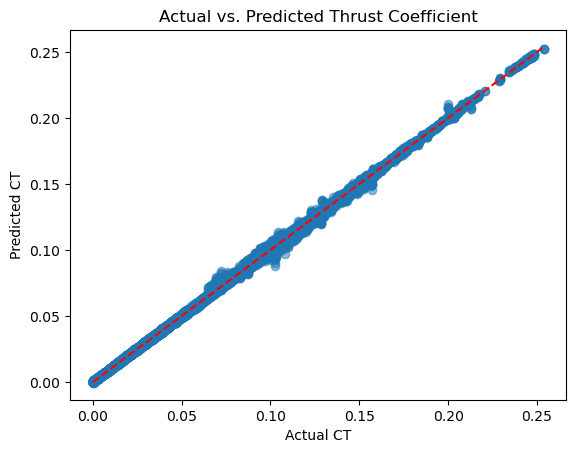

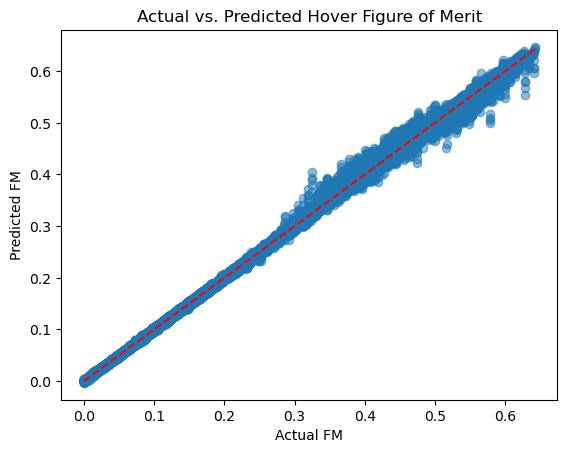

In [42]:
import matplotlib.pyplot as plt

# For thrust coefficient
plt.scatter(y_ct_test, y_ct_pred, alpha=0.5)
plt.plot([min(y_ct_test), max(y_ct_test)], [min(y_ct_test), max(y_ct_test)], color='red', linestyle='--')
plt.xlabel('Actual CT')
plt.ylabel('Predicted CT')
plt.title('Actual vs. Predicted Thrust Coefficient')
plt.show()

# For hover figure of merit
plt.scatter(y_fm_test, y_fm_pred, alpha=0.5)
plt.plot([min(y_fm_test), max(y_fm_test)], [min(y_fm_test), max(y_fm_test)], color='red', linestyle='--')
plt.xlabel('Actual FM')
plt.ylabel('Predicted FM')
plt.title('Actual vs. Predicted Hover Figure of Merit')
plt.show()

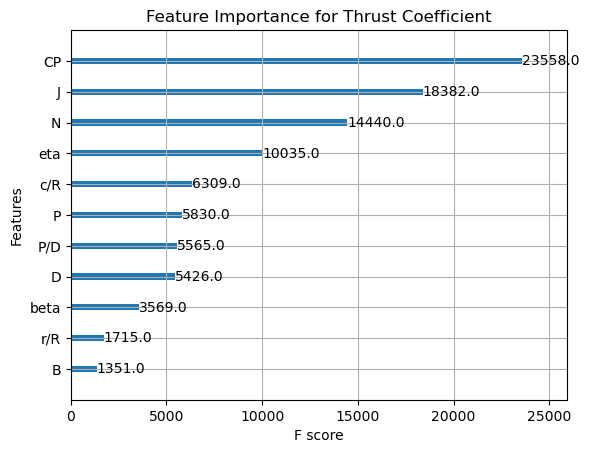

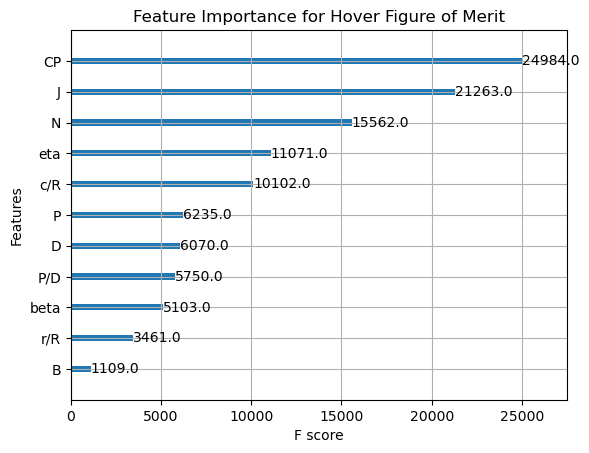

In [43]:
xgb.plot_importance(model_ct)
plt.title('Feature Importance for Thrust Coefficient')
plt.show()

xgb.plot_importance(model_fm)
plt.title('Feature Importance for Hover Figure of Merit')
plt.show()

In [44]:
import joblib

# Save the models
joblib.dump(model_ct, 'model_ct.pkl')
joblib.dump(model_fm, 'model_fm.pkl')

['model_fm.pkl']